### Building Machine Learning Pipelines

In [15]:
from sklearn.datasets import samples_generator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [24]:
# generate sample data
X, y = samples_generator.make_classification(
        n_informative=4, n_features=20, n_redundant=0, random_state=5)

In [25]:
# Feature selector 
selector_k_best = SelectKBest(f_regression, k=10)

# Random forest classifier
classifier = RandomForestClassifier(n_estimators=50, max_depth=4)

# Build the machine learning pipeline
pipeline_classifier = Pipeline([('selector', selector_k_best), ('rf', classifier)])

In [10]:
# We can set the parameters using the names we assigned
# earlier. For example, if we want to set 'k' to 6 in the
# feature selector and set 'n_estimators' in the Random 
# Forest Classifier to 25, we can do it as shown below
pipeline_classifier.set_params(selector__k=6, 
        rf__n_estimators=25)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=6, score_func=<function f_regression at 0x7f4d25553950>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [26]:
# Training the classifier
pipeline_classifier.fit(X, y)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=10, score_func=<function f_regression at 0x7f4d25553950>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spli...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
# Predict the output
prediction = pipeline_classifier.predict(X)
print("Predictions:\n", prediction)

Predictions:
 [1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1]


In [28]:
# Print score
print("Score:", pipeline_classifier.score(X, y))   

Score: 0.97


In [29]:
# Print the selected features chosen by the selector
features_status = pipeline_classifier.named_steps['selector'].get_support()
selected_features = []
for count, item in enumerate(features_status):
    if item:
        selected_features.append(count)

print("Selected features (0-indexed):", ', '.join([str(x) for x in selected_features]))

Selected features (0-indexed): 0, 5, 7, 9, 10, 11, 13, 15, 16, 18


### Finding the Nearest Neighbors

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [31]:
# Input data
X = np.array([[1, 1], [1, 3], [2, 2], [2.5, 5], [3, 1], 
        [4, 2], [2, 3.5], [3, 3], [3.5, 4]])

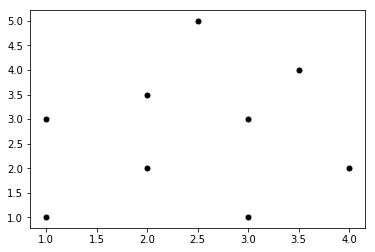

In [32]:
# Number of neighbors we want to find
num_neighbors = 3

# Input point
input_point = [[2.6, 1.7]]

# Plot datapoints
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')

In [33]:
# Build nearest neighbors model
knn = NearestNeighbors(n_neighbors=num_neighbors, algorithm='ball_tree').fit(X)
distances, indices = knn.kneighbors(input_point)

In [34]:
# Print the 'k' nearest neighbors
print("k nearest neighbors")
for rank, index in enumerate(indices[0][:num_neighbors]):
    print(str(rank+1) + " -->", X[index])

k nearest neighbors
1 --> [2. 2.]
2 --> [3. 1.]
3 --> [3. 3.]


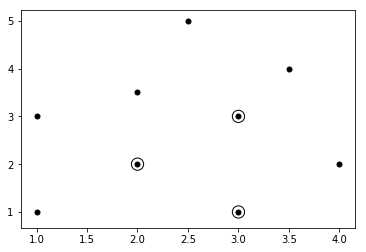

In [35]:
# Plot the nearest neighbors 
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], 
        marker='o', s=150, color='k', facecolors='none')
plt.scatter(input_point[0][0], input_point[0][1],
        marker='x', s=150, color='k', facecolors='none')

plt.show()

### Constructing a K-Nearest Neighbors Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors

from utilities import load_data

In [2]:
# Load input data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/data_nn_classifier.txt'
data = load_data(input_file)
X, y = data[:,:-1], data[:,-1].astype(np.int)

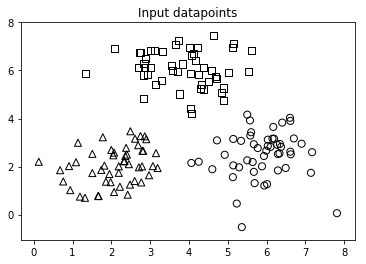

In [3]:
# Plot input data
plt.figure()
plt.title('Input datapoints')
markers = '^sov<>hp'
mapper = np.array([markers[i] for i in y])
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')
plt.savefig('figure1.pdf', format='pdf', dpi=1000)

In [4]:
# Number of nearest neighbors to consider
num_neighbors = 10

# step size of the grid
h = 0.01  

# Create a K-Neighbours Classifier model and train it
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

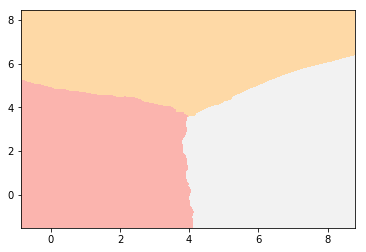

In [5]:
# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the outputs for all the points on the mesh
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

# Put the computed results on the map
predicted_values = predicted_values.reshape(x_grid.shape)
plt.figure()
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)

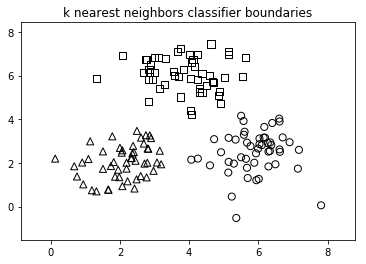

In [6]:
# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title('k nearest neighbors classifier boundaries')
plt.savefig('figure2.pdf', format='pdf', dpi=1000)

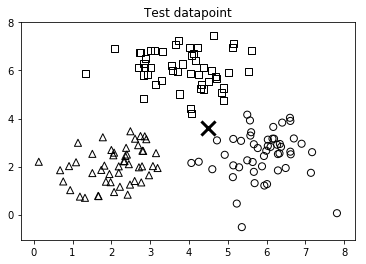

In [7]:
# Test input datapoint
test_datapoint = [[4.5, 3.6]]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0][0], test_datapoint[0][1], marker='x', 
        linewidth=3, s=200, facecolors='black')
plt.savefig('figure2.pdf', format='pdf', dpi=1000)

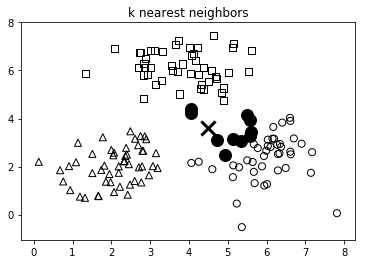

<Figure size 432x288 with 0 Axes>

In [8]:
# Extract k nearest neighbors
dist, indices = classifier.kneighbors(test_datapoint)

# Plot k nearest neighbors
plt.figure()
plt.title('k nearest neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker='o', 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0][0], test_datapoint[0][1], marker='x', 
        linewidth=3, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')


plt.show()
plt.savefig('figure3.pdf', format='pdf', dpi=1000)

In [9]:
print("Predicted output:", classifier.predict(test_datapoint)[0])

Predicted output: 2


### Constructing a K-Nearest Neighbors Regressor

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [12]:
# Generate sample data
amplitude = 10
num_points = 100
X = amplitude * np.random.rand(num_points, 1) - 0.5 * amplitude

# Compute target and add noise
y = np.sinc(X).ravel() 
y += 0.2 * (0.5 - np.random.rand(y.size))

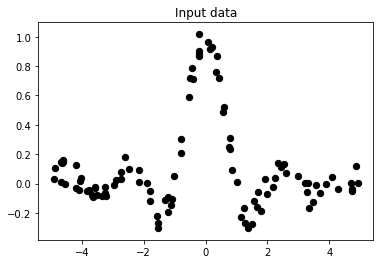

In [13]:
# Plot input data
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none')
plt.title('Input data')
plt.savefig('figure1.pdf', format='pdf', dpi=1000)

In [14]:
# Create the 1D grid with 10 times the density of the input data
x_values = np.linspace(-0.5*amplitude, 0.5*amplitude, 10*num_points)[:, np.newaxis]

# Number of neighbors to consider 
n_neighbors = 8

# Define and train the regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_values = knn_regressor.fit(X, y).predict(x_values)

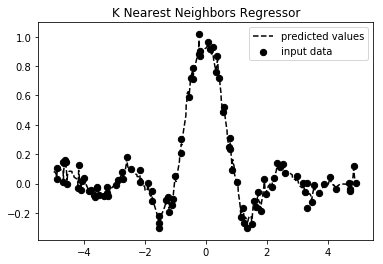

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none', label='input data')
plt.plot(x_values, y_values, c='k', linestyle='--', label='predicted values')
plt.xlim(X.min() - 1, X.max() + 1)
plt.ylim(y.min() - 0.2, y.max() + 0.2)
plt.axis('tight')
plt.legend()
plt.title('K Nearest Neighbors Regressor')

plt.show()
plt.savefig('figure2.pdf', format='pdf', dpi=1000)

### Computing the Euclidean Distance Score

In [16]:
import json
import numpy as np

In [17]:
# Returns the Euclidean distance score between user1 and user2 
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('User ' + user1 + ' not present in the dataset')

    if user2 not in dataset:
        raise TypeError('User ' + user2 + ' not present in the dataset')

    # Movies rated by both user1 and user2
    rated_by_both = {} 

    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item] = 1

    # If there are no common movies, the score is 0 
    if len(rated_by_both) == 0:
        return 0

    squared_differences = [] 

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_differences.append(np.square(dataset[user1][item] - dataset[user2][item]))
        
    return 1 / (1 + np.sqrt(np.sum(squared_differences))) 

In [18]:
if __name__=='__main__':
    data_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user1 = 'John Carson'
    user2 = 'Michelle Peterson'

    print("Euclidean score:")
    print(euclidean_score(data, user1, user2)) 

Euclidean score:
0.29429805508554946


### Computing the Pearson Correlation Score

In [24]:
import json
import numpy as np

In [25]:
# Returns the Pearson correlation score between user1 and user2 
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('User ' + user1 + ' not present in the dataset')

    if user2 not in dataset:
        raise TypeError('User ' + user2 + ' not present in the dataset')

    # Movies rated by both user1 and user2
    rated_by_both = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item] = 1

    num_ratings = len(rated_by_both) 

    # If there are no common movies, the score is 0 
    if num_ratings == 0:
        return 0

    # Compute the sum of ratings of all the common preferences 
    user1_sum = np.sum([dataset[user1][item] for item in rated_by_both])
    user2_sum = np.sum([dataset[user2][item] for item in rated_by_both])

    # Compute the sum of squared ratings of all the common preferences 
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in rated_by_both])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in rated_by_both])

    # Compute the sum of products of the common ratings 
    product_sum = np.sum([dataset[user1][item] * dataset[user2][item] for item in rated_by_both])

    # Compute the Pearson correlation
    Sxy = product_sum - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

In [26]:
if __name__=='__main__':
    data_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user1 = 'John Carson'
    user2 = 'Michelle Peterson'

    print("Pearson score:")
    print(pearson_score(data, user1, user2)) 

Pearson score:
0.39605901719066977


### Finding Similar Users in the Dataset 

In [27]:
import json
import numpy as np

from pearson_score import pearson_score

In [28]:
# Finds a specified number of users who are similar to the input user
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('User ' + user + ' not present in the dataset')

    # Compute Pearson scores for all the users
    scores = np.array([[x, pearson_score(dataset, user, x)] for x in dataset if user != x])

    # Sort the scores based on second column
    scores_sorted = np.argsort(scores[:, 1])

    # Sort the scores in decreasing order (highest score first) 
    scored_sorted_dec = scores_sorted[::-1]

    # Extract top 'k' indices
    top_k = scored_sorted_dec[0:num_users] 

    return scores[top_k] 

In [35]:
if __name__=='__main__':
    data_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user = 'John Carson'
    print("Users similar to " + user + ":\n")
    similar_users = find_similar_users(data, user, 3) 
    print("User\t\t\tSimilarity score\n")
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]), 2))

Users similar to John Carson:

User			Similarity score

Michael Henry 		 0.99
Alex Roberts 		 0.75
Melissa Jones 		 0.59


### Generating Movie Recommendations

In [36]:
import json
import numpy as np

from pearson_score import pearson_score

In [37]:
# Generate recommendations for a given user
def generate_recommendations(dataset, user):
    if user not in dataset:
        raise TypeError('User ' + user + ' not present in the dataset')

    total_scores = {}
    similarity_sums = {}

    for u in [x for x in dataset if x != user]:
        similarity_score = pearson_score(dataset, user, u)

        if similarity_score <= 0:
            continue

        for item in [x for x in dataset[u] if x not in dataset[user] or dataset[user][x] == 0]:
            total_scores.update({item: dataset[u][item] * similarity_score})
            similarity_sums.update({item: similarity_score})

    if len(total_scores) == 0:
        return ['No recommendations possible']

    # Create the normalized list
    movie_ranks = np.array([[total/similarity_sums[item], item] 
            for item, total in total_scores.items()])

    # Sort in decreasing order based on the first column
    movie_ranks = movie_ranks[np.argsort(movie_ranks[:, 0])[::-1]]

    # Extract the recommended movies
    recommendations = [movie for _, movie in movie_ranks]

    return recommendations

In [42]:
if __name__=='__main__':
    data_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user = 'Michael Henry'
    print("Recommendations for " + user + ":")
    movies = generate_recommendations(data, user) 
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)

    user = 'John Carson' 
    print("Recommendations for " + user + ":")
    movies = generate_recommendations(data, user) 
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)

Recommendations for Michael Henry:
1. Jerry Maguire
2. Inception
3. Anger Management
Recommendations for John Carson:
1. No recommendations possible


### Implementing Ranking Algorithms 

In [1]:
import pyltr

In [2]:
path = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/'

with open(path + 'train.txt') as trainfile, \
        open(path + 'vali.txt') as valifile, \
        open(path + 'test.txt') as testfile:
    TrainX, Trainy, Trainqids, _ = pyltr.data.letor.read_dataset(trainfile)
    ValX, Valy, Valqids, _ = pyltr.data.letor.read_dataset(valifile)
    TestX, Testy, Testqids, _ = pyltr.data.letor.read_dataset(testfile)

In [17]:
metric = pyltr.metrics.NDCG(k=10)

# Only needed if you want to perform validation (early stopping & trimming)
monitor = pyltr.models.monitors.ValidationMonitor(
    ValX, Valy, Valqids, metric=metric, stop_after=250)

In [18]:
model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=1000,
    learning_rate=0.02,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=10,
    min_samples_leaf=64,
    verbose=1,
)

In [19]:
model.fit(TestX, Testy, Testqids, monitor=monitor)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.1713       0.1765        6.24m      C:      0.1554 B:      0.1554 S:  0
    2       0.3698       0.1655        6.18m      C:      0.3299 B:      0.3299 S:  0
    3       0.4326       0.0384        6.35m      C:      0.3790 B:      0.3790 S:  0
    4       0.4183       0.0215        6.41m      C:      0.4054 B:      0.4054 S:  0
    5       0.4694       0.0048        6.38m      C:      0.4194 B:      0.4194 S:  0
    6       0.4612       0.0006        6.32m      C:      0.4293 B:      0.4293 S:  0
    7       0.4398      -0.0060        6.28m      C:      0.4306 B:      0.4306 S:  0
    8       0.4923      -0.0010        6.29m      C:      0.4334 B:      0.4334 S:  0
    9       0.4622       0.0033        6.28m      C:      0.4389 B:      0.4389 S:  0
   10       0.5060      -0.0024        6.28m      C:      0.4390 B:      0.4390 S:  0
   15       0.4971      -0.0001        6.24m      C: 

In [20]:
Testpred = model.predict(TestX)
print('Random ranking:', metric.calc_mean_random(Testqids, Testy))
print('Our model:', metric.calc_mean(Testqids, Testy, Testpred))

Random ranking: 0.27258472902087394
Our model: 0.5268588293826652


### Building a Filtering Model Using TensorFlow

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [22]:
path = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter06/'

Data = pd.read_csv(path + 'ratings.csv', sep=';', names=['user', 'item', 'rating', 'timestamp'], header=None)

Data = Data.iloc[:,0:3]

NumItems = Data.item.nunique() 
NumUsers = Data.user.nunique()

print('Item: ', NumItems)
print('Users: ', NumUsers)

Item:  3706
Users:  6040


In [23]:
Data['rating'] = Data['rating'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DataScaled = pd.DataFrame(scaler.fit_transform(Data['rating'].values.reshape(-1,1)))
Data['rating'] = DataScaled

UserItemMatrix = Data.pivot(index='user', columns='item', values='rating')
UserItemMatrix.fillna(0, inplace=True)

Users = UserItemMatrix.index.tolist()
Items = UserItemMatrix.columns.tolist()

UserItemMatrix = UserItemMatrix.as_matrix()

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [39]:
NumInput = NumItems
NumHidden1 = 10
NumHidden2 = 5

X = tf.placeholder(tf.float64, [None, NumInput])

weights = {
    'EncoderH1': tf.Variable(tf.random_normal([NumInput, NumHidden1], dtype=tf.float64)),
    'EncoderH2': tf.Variable(tf.random_normal([NumHidden1, NumHidden2], dtype=tf.float64)),
    'DecoderH1': tf.Variable(tf.random_normal([NumHidden2, NumHidden1], dtype=tf.float64)),
    'DecoderH2': tf.Variable(tf.random_normal([NumHidden1, NumInput], dtype=tf.float64)),
}

biases = {
    'EncoderB1': tf.Variable(tf.random_normal([NumHidden1], dtype=tf.float64)),
    'EncoderB2': tf.Variable(tf.random_normal([NumHidden2], dtype=tf.float64)),
    'DecoderB1': tf.Variable(tf.random_normal([NumHidden1], dtype=tf.float64)),
    'DecoderB2': tf.Variable(tf.random_normal([NumInput], dtype=tf.float64)),
}

In [40]:
def encoder(x):
    Layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['EncoderH1']), biases['EncoderB1']))
    Layer2 = tf.nn.sigmoid(tf.add(tf.matmul(Layer1, weights['EncoderH2']), biases['EncoderB2']))
    return Layer2


# Building the decoder

def decoder(x):
    Layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['DecoderH1']), biases['DecoderB1']))
    Layer2 = tf.nn.sigmoid(tf.add(tf.matmul(Layer1, weights['DecoderH2']), biases['DecoderB2']))
    return Layer2


EncoderOp = encoder(X)
DecoderOp = decoder(EncoderOp)


YPred = DecoderOp

YTrue = X

loss = tf.losses.mean_squared_error(YTrue, YPred)
Optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)


EvalX = tf.placeholder(tf.int32, )
EvalY = tf.placeholder(tf.int32, )
Pre, PreOp = tf.metrics.precision(labels=EvalX, predictions=EvalY)

In [41]:
Init = tf.global_variables_initializer()
LocalInit = tf.local_variables_initializer()

PredData = pd.DataFrame()

with tf.Session() as session:
    Epochs = 120
    BatchSize = 200

    session.run(Init)
    session.run(LocalInit)

    NumBatches = int(UserItemMatrix.shape[0] / BatchSize)
    UserItemMatrix = np.array_split(UserItemMatrix, NumBatches)
    
    for i in range(Epochs):

        AvgCost = 0

        for batch in UserItemMatrix:
            _, l = session.run([Optimizer, loss], feed_dict={X: batch})
            AvgCost += l

        AvgCost /= NumBatches

        print("Epoch: {} Loss: {}".format(i + 1, AvgCost))

    UserItemMatrix = np.concatenate(UserItemMatrix, axis=0)

    Preds = session.run(DecoderOp, feed_dict={X: UserItemMatrix})

    PredData = PredData.append(pd.DataFrame(Preds))

    PredData = PredData.stack().reset_index(name='rating')
    PredData.columns = ['user', 'item', 'rating']
    PredData['user'] = PredData['user'].map(lambda value: Users[value])
    PredData['item'] = PredData['item'].map(lambda value: Items[value])
    
    keys = ['user', 'item']
    Index1 = PredData.set_index(keys).index
    Index2 = Data.set_index(keys).index

    TopTenRanked = PredData[~Index1.isin(Index2)]
    TopTenRanked = TopTenRanked.sort_values(['user', 'rating'], ascending=[True, False])
    TopTenRanked = TopTenRanked.groupby('user').head(10)
    
    print(TopTenRanked.head(n=10))

Epoch: 1 Loss: 0.34791967074076335
Epoch: 2 Loss: 0.3469028890132904
Epoch: 3 Loss: 0.34162496626377103
Epoch: 4 Loss: 0.3168571710586548
Epoch: 5 Loss: 0.2790686031182607
Epoch: 6 Loss: 0.23859522640705108
Epoch: 7 Loss: 0.11656970195472241
Epoch: 8 Loss: 0.027989649524291355
Epoch: 9 Loss: 0.02128003891557455
Epoch: 10 Loss: 0.020207831325630348
Epoch: 11 Loss: 0.01980790086090565
Epoch: 12 Loss: 0.019727089193960032
Epoch: 13 Loss: 0.019687880327304206
Epoch: 14 Loss: 0.01966147677352031
Epoch: 15 Loss: 0.019643220429619152
Epoch: 16 Loss: 0.019621152120331924
Epoch: 17 Loss: 0.01939657675102353
Epoch: 18 Loss: 0.019367488473653792
Epoch: 19 Loss: 0.019360575576623282
Epoch: 20 Loss: 0.019355244530985753
Epoch: 21 Loss: 0.01935093691572547
Epoch: 22 Loss: 0.01934709508592884
Epoch: 23 Loss: 0.019343302492052315
Epoch: 24 Loss: 0.01933624306693673
Epoch: 25 Loss: 0.019125238868097465
Epoch: 26 Loss: 0.0190646896759669
Epoch: 27 Loss: 0.019048879326631626
Epoch: 28 Loss: 0.01898307846